# THE SPARK FOUNDATION INTERNSHIP

## Author : Saba Badruddin Inamdar

### GRIPSEP21

### (Data Science And Business Analytics)


**TASK1 : Prediction Using Supervised ML**

**Problem Statement : Predict the percentage of an student based on number of study hours.**

In this task,we will predict the percentage of marks that students score based on number of hours they studied.
This is simple linear regression task,as it involve only two variable

#### Step1: Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

#### Step2 : Reading data file

In [2]:
# Reading data 

student_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully.")

student_data.head(25)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Cheacking if there are any null values
student_data.isnull == True

False

**There is no null value in this dataset,so we can plot 2D graph to find relationship between data.**

#### Step-3: Exploratory Data Analysis

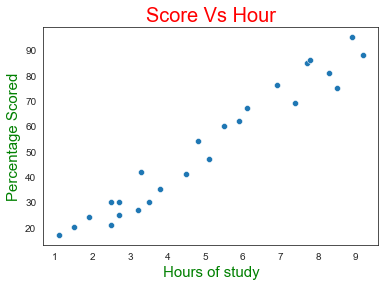

In [4]:
# Plotting the distributions
sns.set_style('white')
sns.scatterplot(y = student_data['Scores'], x = student_data['Hours'])
plt.title("Score Vs Hour", size=20, color='red')
plt.xlabel("Hours of study", size=15, color='green')
plt.ylabel('Percentage Scored', size=15, color='green')
plt.show()

#### Step-4: Plotting the Regression line

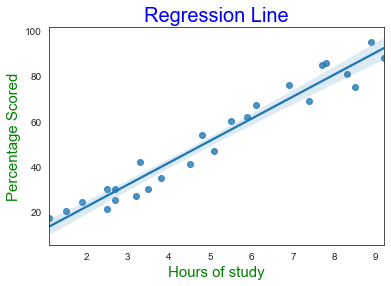

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(y = student_data['Scores'], x = student_data['Hours'])
plt.title('Regression Line', size=20, color='blue')
plt.xlabel("Hours of study", size=15, color='green')
plt.ylabel('Percentage Scored', size=15, color='green')
plt.show()
print(student_data.corr())

#### Step-4: Preparing And Splitting the Data

In [6]:
# divide data into input and output
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values

In [7]:
#Splitting the data into training and testing sets

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

#### Step-5: Training the Algorithm

**We have split dataset into training and testing sets. Now we will train our algorithm.**

In [8]:
regression = LinearRegression()
regression.fit(train_x,train_y)

print("Model Trained.")

Model Trained.


#### Step-6 : Predicting Percentage

In [9]:
pred_y = regression.predict(test_x)
prediction = pd.DataFrame({'Hours':[i[0] for i in test_x],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Comparing Actual And Predicted Marks**

In [10]:
# Comapring Actual Vs Predicted
df = pd.DataFrame({'Actual': test_y, 'Predicted':pred_y})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


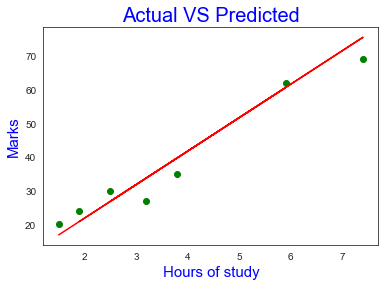

In [11]:
#Plotting Actual And Predicted Marks

plt.scatter(x=test_x, y=test_y, color='green')
plt.plot(test_x,pred_y, color='red')
plt.title('Actual VS Predicted', size=20, color='blue')
plt.xlabel('Hours of study', size=15, color='blue')
plt.ylabel('Marks', size=15, color='blue')
plt.show()

#### Step-7: Evaluating Model

In [12]:
# mean absolute error to evaluate performance of algorithm 

print("Mean Squared Error :",metrics.mean_squared_error(test_y,pred_y))
print("Mean Absolute Error :",metrics.mean_absolute_error(test_y,pred_y))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(test_y,pred_y)))

Mean Squared Error : 20.33292367497997
Mean Absolute Error : 4.130879918502486
Root Mean Squared Error : 4.5092043283688055


#### Step-8: Predicting the score if student studied for 9.25 hours/day:

In [13]:
hours = [9.25]
result = regression.predict([hours])
print("Predicted score",result[0])

Predicted score 93.89272889341655


**Conclusion: According to linear regression model,predicted score for a student who studied 9.25 hours/day will be 93.89 percent.**